In [577]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cupy as cp
print(tf.__version__)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2.16.2


make the data cleaning

In [578]:
from scipy import stats
import numpy as np
#z = np.abs(stats.zscore())
#print(z)

model used for monarch butterflies

In [579]:
dff=pd.read_csv("/home/jace/butterfliy/combined_fall_data.csv")
dff.drop("Unnamed: 0",axis=1,inplace=True)
dff
dfs=pd.read_csv("/home/jace/butterfliy/combined_spring_data.csv")
dfs.drop("Unnamed: 0",axis=1,inplace=True)
dfs['seasonal']="0"
dff['seasonal']="1"

df_merged = pd.concat([dff, dfs], ignore_index=True, sort=False)
df_merged['year']=df_merged.Date.str.split('/').str[-1]
df_merged=df_merged.sort_values('year')
df_merged.drop("year",axis=1,inplace=True)
df_merged=df_merged[df_merged.Date!="Date"]
#df_merged=df_merged.sample(frac=0.1)
#df_merged.to_csv('merged.csv')

df_merged

,Date,Town,State/Province,Latitude,Longitude,seasonal
112871,1/1/17,Arroyo Grande,CA,35.1,-120.6,0
27485,9/23/17,Pentwater,MI,43.8,-86.4,1
27484,9/23/17,Annapolis,MD,38.9,-76.5,1
27483,9/23/17,Annapolis,MD,38.9,-76.5,1
27482,9/23/17,Kansas City,MO,39.1,-94.6,1
...,...,...,...,...,...,...
87225,7/28/24,Pass Christian,MS,30.4,-89.3,0
87227,7/28/24,Monona,WI,43.1,-89.3,0
87230,7/28/24,Cape May Point,NJ,38.9,-75,0
87229,7/28/24,Windsor,ON,42.3,-83,0


In [580]:
dfs['seasonal']="spring"
dff['seasonal']="fall"
df_merged = pd.concat([dff, dfs], ignore_index=True, sort=False)
df_merged.sort_index()
df_merged.to_csv('merged.csv')


In [581]:
df_merged=df_merged[df_merged["State/Province"]!="England"]
df_merged=df_merged[df_merged["State/Province"]!="Spanish Wells"]
df_merged=df_merged[df_merged["State/Province"]!="Bay Islands Department"]
df_merged=df_merged[df_merged["State/Province"]!="Saint Thomas Lowland Parish"]
df_merged=df_merged[df_merged["State/Province"]!="Saint George Basseterre Parish"]
df_merged=df_merged[df_merged["State/Province"]!="GRO"]
df_merged=df_merged[df_merged["State/Province"]!="CHH"]
df_merged=df_merged[df_merged["State/Province"]!="MEX"]
df_merged=df_merged[df_merged["State/Province"]!="SLP"]
df_merged=df_merged[df_merged["State/Province"]!="TAM"]
df_merged=df_merged[df_merged["State/Province"]!="St John"]
df_merged=df_merged[df_merged["State/Province"]!="San JosÃ©"]
df_merged=df_merged[df_merged["State/Province"]!="ZAC"]
df_merged=df_merged[df_merged["State/Province"]!="ColÃ³n Province"]
df_merged=df_merged[df_merged["State/Province"]!="VIC"]
df_merged=df_merged[df_merged["State/Province"]!="BCS"]
df_merged=df_merged[df_merged["State/Province"]!="Saint George Gingerland Parish"]
df_merged=df_merged[df_merged["State/Province"]!="NLE"]
df_merged=df_merged[df_merged["State/Province"]!="DUR"]
df_merged=df_merged[df_merged["State/Province"]!="St Croix"]
df_merged=df_merged[df_merged["State/Province"]!="nan"]
df_merged=df_merged[df_merged["State/Province"]!="Miquelon-Langlade"]
df_merged=df_merged[df_merged["State/Province"]!="BCN"]
df_merged=df_merged[df_merged["State/Province"]!="CMX"]
df_merged=df_merged[df_merged["State/Province"]!="SaÃ¯da Province"]
df_merged=df_merged[df_merged["State/Province"]!="Bonaire"]
df_merged=df_merged[df_merged["State/Province"]!="Xinjiang"]
df_merged=df_merged[df_merged["State/Province"]!="AGU"]
df_merged=df_merged[df_merged["State/Province"]!="Saint-Pierre"]
df_merged=df_merged[df_merged["State/Province"]!="SIN"]
df_merged=df_merged[df_merged["State/Province"]!="GUA"]
df_merged=df_merged[df_merged["State/Province"]!="JAL"]
df_merged=df_merged[df_merged["State/Province"]!="ROO"]
df_merged=df_merged[df_merged["State/Province"]!="QUE"]
df_merged=df_merged[df_merged["State/Province"]!="MOR"]
df_merged=df_merged[df_merged["State/Province"]!="nan"]
df_merged=df_merged[df_merged["State/Province"]!="MIC"]
df_merged=df_merged[df_merged["State/Province"]!="YUC"]
df_merged=df_merged[df_merged["State/Province"]!="SON"]
df_merged=df_merged[df_merged["State/Province"]!="COA"]
df_merged=df_merged[df_merged["State/Province"]!="NL"]
df_merged=df_merged[df_merged["State/Province"]!='NV']
df_merged=df_merged[df_merged["State/Province"]!='SK']
df_merged=df_merged[df_merged["State/Province"]!='WA']
df_merged=df_merged[df_merged["State/Province"]!='MT']
df_merged=df_merged[df_merged["State/Province"]!='WY']
df_merged=df_merged[df_merged["State/Province"]!='AB']
df_merged=df_merged[df_merged["State/Province"]!='HI']
df_merged=df_merged[df_merged["State/Province"]!='BC']
df_merged=df_merged[df_merged["State/Province"]!='PE']
df_merged=df_merged[df_merged["State/Province"]!='Wisconsin']
df_merged=df_merged[df_merged["State/Province"]!='QC']
df_merged=df_merged[df_merged["State/Province"]!='Central Abaco']
df_merged=df_merged[df_merged["State/Province"]!='State/Province']
df_merged=df_merged[df_merged["State/Province"]!='NAY']


len(df_merged)

111052

In [582]:
df_merged["State/Province"].value_counts()
df_merged.to_csv("cleaned_merged.csv")

In [583]:
#df=df[df.Date!="Date"]
#df.drop("Unnamed: 0",axis=1,inplace=True)
#df

In [609]:
pf=pd.read_csv("/home/jace/butterfliy/Datathon 2024/USDA_PDP_AnalyticalResults.csv")
pf=pf.fillna(0)
pf

/tmp/ipykernel_383204/1837692376.py:1: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  pf=pd.read_csv("/home/jace/butterfliy/Datathon 2024/USDA_PDP_AnalyticalResults.csv")


,Sample ID,Commod,Pesticide Code,Pesticide Name,Test Class,Concentration,LOD,pp_,Confirm 1,Confirm 2,Annotate,Quantitate,Mean,Extract,Determ,EPA Tolerance (ppm)
0,CA9401180009APCA1,AP,157,Thiabendazole,B,0.1900,0.030,M,M,0,0,H,O,0,0.0,10
1,CA9401180009APCA1,AP,125,Diphenylamine (DPA),F,1.0000,0.010,M,M,0,0,H,O,0,0.0,10
2,CA9401180084APCA1,AP,125,Diphenylamine (DPA),F,0.1100,0.010,M,M,0,0,H,O,0,0.0,10
3,CA9401180084APCA1,AP,157,Thiabendazole,B,0.0910,0.030,M,M,0,0,H,O,0,0.0,10
4,CA9401180089APCA1,AP,042,Azinphos methyl,C,0.2700,0.020,M,D,M,0,M,O,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597500,TX2001130216BNOH1,BN,B48,Azoxystrobin,F,0.0072,0.002,M,LU,0,0,0,O,805,52.0,0.1 EP
597501,TX2006010216BNOH1P,BN,B48,Azoxystrobin,F,0.0033,0.002,M,LU,0,Q,0,O,805,52.0,0.1 EP
597502,TX2010050108BNOH1P,BN,B48,Azoxystrobin,F,0.0068,0.002,M,LU,0,0,0,O,805,52.0,0.1 EP
597503,TX2006010216BNOH1P,BN,B52,Buprofezin,F,0.0172,0.001,M,LU,0,0,0,O,805,52.0,0.2


In [585]:
#df[df.State == "TX"]['Concentration'].value_counts()

In [586]:
#df[df.State == "CA"]['Concentration'].value_counts()


In [610]:
state_id=[]
sample_id=[]
year=[]
month=[]
day=[]
site=[]
Commodity=[]
lab=[]
for i in pf['Sample ID']:
    state_id.append(i[0:2])
    year.append(i[2:4])
    month.append(i[4:6])
    day.append(i[6:8])
    site.append(i[8:12])
    Commodity.append(i[12:14])
    lab.append(i[14:16])
    sample_id.append(i[16:])
    
pf['State']=state_id
pf['Sample ID']=sample_id
pf['year']=year
pf['month']=month
pf['day']=day
pf['site']=site
pf['Commodity']=Commodity
pf["ana lab"]=lab
pf

,Sample ID,Commod,Pesticide Code,Pesticide Name,Test Class,Concentration,LOD,pp_,Confirm 1,Confirm 2,...,Extract,Determ,EPA Tolerance (ppm),State,year,month,day,site,Commodity,ana lab
0,1,AP,157,Thiabendazole,B,0.1900,0.030,M,M,0,...,0,0.0,10,CA,94,01,18,0009,AP,CA
1,1,AP,125,Diphenylamine (DPA),F,1.0000,0.010,M,M,0,...,0,0.0,10,CA,94,01,18,0009,AP,CA
2,1,AP,125,Diphenylamine (DPA),F,0.1100,0.010,M,M,0,...,0,0.0,10,CA,94,01,18,0084,AP,CA
3,1,AP,157,Thiabendazole,B,0.0910,0.030,M,M,0,...,0,0.0,10,CA,94,01,18,0084,AP,CA
4,1,AP,042,Azinphos methyl,C,0.2700,0.020,M,D,M,...,0,0.0,2,CA,94,01,18,0089,AP,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597500,1,BN,B48,Azoxystrobin,F,0.0072,0.002,M,LU,0,...,805,52.0,0.1 EP,TX,20,01,13,0216,BN,OH
597501,1P,BN,B48,Azoxystrobin,F,0.0033,0.002,M,LU,0,...,805,52.0,0.1 EP,TX,20,06,01,0216,BN,OH
597502,1P,BN,B48,Azoxystrobin,F,0.0068,0.002,M,LU,0,...,805,52.0,0.1 EP,TX,20,10,05,0108,BN,OH
597503,1P,BN,B52,Buprofezin,F,0.0172,0.001,M,LU,0,...,805,52.0,0.2,TX,20,06,01,0216,BN,OH


In [613]:
pf=pf[pf["year"]>="17"]
pf=pf[pf["year"]<="24"]
pf.describe()

,Concentration,LOD,Determ
count,129754.000000,129754.00000,129754.000000
mean,0.169045,0.01280,49.652581
std,1.799204,0.20026,11.941655
min,0.001000,0.00100,35.000000
25%,0.005000,0.00130,35.000000
50%,0.014000,0.00250,52.000000
75%,0.050200,0.00500,52.000000
max,153.000000,6.80000,80.000000


In [588]:
agcensus=pd.read_csv("/home/jace/butterfliy/AgCensus_MasterDataFrame.csv",sep="\t")
agcensus = agcensus.iloc[: , -76:]
agcensus

,Brl2012,Bkw2012,Crn2012,Ctn2012,Flx2012,Hay2012,Oat2012,Pnt2012,Ptt2012,Pls2012,...,Hmn2017,STATE,COUNTY,FIPS,STCTY,AREA_KM,Bailey_Eco,USDA_FRR,Lon,Lat
0,0.000000,0.0,0.000000,0.0,0.0,0.003653,0.000000,0.0,0.000038,0.000029,...,2.263467,CT,Fairfield County,9001,1_10,1686.027972,Eastern Broadleaf Forest (Oceanic),Northern Crescent,-73.389635,41.273346
1,0.000000,0.0,0.002945,0.0,0.0,0.023414,0.000000,0.0,0.000023,0.000041,...,0.608062,CT,New London County,9011,1_110,1779.730942,Eastern Broadleaf Forest (Oceanic),Northern Crescent,-72.101133,41.489228
2,0.037012,0.0,0.129001,0.0,0.0,0.016462,0.000000,0.0,0.000000,0.014186,...,0.456045,DE,Kent County,10001,11_10,1566.188653,Outer Coastal Plain Mixed Forest,Southern Seaboard,-75.565760,39.086022
3,0.000000,0.0,0.003179,0.0,0.0,0.028516,0.000000,0.0,0.000000,0.000000,...,0.566148,CT,Tolland County,9013,1_130,1079.400823,Eastern Broadleaf Forest (Oceanic),Northern Crescent,-72.336581,41.855240
4,0.012882,0.0,0.073210,0.0,0.0,0.013534,0.000000,0.0,0.000000,0.000019,...,1.785173,DE,New Castle County,10003,11_30,1260.332999,Eastern Broadleaf Forest (Oceanic),Southern Seaboard,-75.640388,39.581101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,0.000000,0.0,0.000000,0.0,0.0,0.025842,0.000003,0.0,0.002128,0.000025,...,0.159560,WA,Whatcom County,53073,73_730,5615.436029,Pacific Lowland Mixed Forest,Fruitful Rim,-121.717176,48.825812
3105,0.060059,0.0,0.000000,0.0,0.0,0.012919,0.000000,0.0,0.000000,0.090413,...,0.035429,WA,Whitman County,53075,73_750,5640.460664,Great Plains-Palouse Dry Steppe & Black Hills,Basin and Range,-117.523841,46.900592
3106,0.000097,0.0,0.005187,0.0,0.0,0.013364,0.000000,0.0,0.000613,0.000135,...,0.090638,WA,Yakima County,53077,73_770,11158.472395,Pacific Lowland Mixed Forest,Fruitful Rim,-120.737783,46.456669
3107,0.000375,0.0,0.000000,0.0,0.0,0.004515,0.000000,0.0,0.000007,0.000007,...,0.066354,WA,Clallam County,53009,73_90,4612.905639,Pacific Lowland Mixed Forest,Fruitful Rim,-123.931633,48.049236


In [589]:
for i in agcensus.keys():
    print(i)

Brl2012
Bkw2012
Crn2012
Ctn2012
Flx2012
Hay2012
Oat2012
Pnt2012
Ptt2012
Pls2012
Ric2012
Rye2012
Sgm2012
Soy2012
Swt2012
Sgc2012
Tbc2012
Wht2012
Cat2012
Hrs2012
Shp2012
Swn2012
Ckn2012
Tky2012
Brl2017
Bkw2017
Crn2017
Ctn2017
Flx2017
Hay2017
Oat2017
Pnt2017
Ptt2017
Pls2017
Ric2017
Rye2017
Sgm2017
Soy2017
Swt2017
Sgc2017
Tbc2017
Wht2017
Cat2017
Hrs2017
Shp2017
Swn2017
Ckn2017
Tky2017
Hmn1840
Hmn1850
Hmn1860
Hmn1870
Hmn1880
Hmn1890
Hmn1900
Hmn1910
Hmn1920
Hmn1930
Hmn1940
Hmn1950
Hmn1959
Hmn1974
Hmn1982
Hmn1992
Hmn2002
Hmn2012
Hmn2017
STATE
COUNTY
FIPS
STCTY
AREA_KM
Bailey_Eco
USDA_FRR
Lon
Lat


In [590]:
df=pd.read_csv("/home/jace/butterfliy/cleaned_merged_fin.csv")
df=df.drop("Unnamed: 0",axis=1)
df

,Date,Town,State/Province,Latitude,Longitude,seasonal
0,12/31/18,Homer City,PA,40.5,-79.2,fall
1,12/30/18,Edisto Island,SC,32.5,-80.3,fall
2,12/30/18,Crawfordville,FL,30.1,-84.3,fall
3,12/29/18,Edisto Island,SC,32.6,-80.3,fall
4,12/28/18,Nags Head,NC,35.8,-75.6,fall
...,...,...,...,...,...,...
111047,1/1/17,Pacific Grove,CA,36.6,-121.9,spring
111048,1/1/17,Morro Bay,CA,35.4,-120.8,spring
111049,1/1/17,Santa Cruz,CA,37.1,-122.2,spring
111050,1/1/17,Alder Rd vortex,CA,37.9,-122.7,spring


In [591]:
pf[pf["State"].isin(df['State/Province'].unique())]

,Sample ID,Commod,Pesticide Code,Pesticide Name,Test Class,Concentration,LOD,pp_,Confirm 1,Confirm 2,Annotate,Quantitate,Mean,Extract,Determ,EPA Tolerance (ppm),State,year
0,01180009APCA1,AP,157,Thiabendazole,B,0.1900,0.030,M,M,0,0,H,O,0,0.0,10,CA,94
1,01180009APCA1,AP,125,Diphenylamine (DPA),F,1.0000,0.010,M,M,0,0,H,O,0,0.0,10,CA,94
2,01180084APCA1,AP,125,Diphenylamine (DPA),F,0.1100,0.010,M,M,0,0,H,O,0,0.0,10,CA,94
3,01180084APCA1,AP,157,Thiabendazole,B,0.0910,0.030,M,M,0,0,H,O,0,0.0,10,CA,94
4,01180089APCA1,AP,042,Azinphos methyl,C,0.2700,0.020,M,D,M,0,M,O,0,0.0,2,CA,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597500,01130216BNOH1,BN,B48,Azoxystrobin,F,0.0072,0.002,M,LU,0,0,0,O,805,52.0,0.1 EP,TX,20
597501,06010216BNOH1P,BN,B48,Azoxystrobin,F,0.0033,0.002,M,LU,0,Q,0,O,805,52.0,0.1 EP,TX,20
597502,10050108BNOH1P,BN,B48,Azoxystrobin,F,0.0068,0.002,M,LU,0,0,0,O,805,52.0,0.1 EP,TX,20
597503,06010216BNOH1P,BN,B52,Buprofezin,F,0.0172,0.001,M,LU,0,0,0,O,805,52.0,0.2,TX,20


In [592]:
from scipy import stats 
pf['LOD_zscore'] = stats.zscore(pf['LOD']) 
pf['Concentration_zscore'] = stats.zscore(pf['Concentration']) 
pf['Determ_zscore'] = stats.zscore(pf['Determ']) 
#pf['Extract_zscore'] = stats.zscore(pf['Extract']) 

pf

,Sample ID,Commod,Pesticide Code,Pesticide Name,Test Class,Concentration,LOD,pp_,Confirm 1,Confirm 2,...,Quantitate,Mean,Extract,Determ,EPA Tolerance (ppm),State,year,LOD_zscore,Concentration_zscore,Determ_zscore
0,01180009APCA1,AP,157,Thiabendazole,B,0.1900,0.030,M,M,0,...,H,O,0,0.0,10,CA,94,-0.122776,-0.078629,-1.795963
1,01180009APCA1,AP,125,Diphenylamine (DPA),F,1.0000,0.010,M,M,0,...,H,O,0,0.0,10,CA,94,-0.127743,-0.071067,-1.795963
2,01180084APCA1,AP,125,Diphenylamine (DPA),F,0.1100,0.010,M,M,0,...,H,O,0,0.0,10,CA,94,-0.127743,-0.079376,-1.795963
3,01180084APCA1,AP,157,Thiabendazole,B,0.0910,0.030,M,M,0,...,H,O,0,0.0,10,CA,94,-0.122776,-0.079553,-1.795963
4,01180089APCA1,AP,042,Azinphos methyl,C,0.2700,0.020,M,D,M,...,M,O,0,0.0,2,CA,94,-0.125260,-0.077882,-1.795963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597500,01130216BNOH1,BN,B48,Azoxystrobin,F,0.0072,0.002,M,LU,0,...,0,O,805,52.0,0.1 EP,TX,20,-0.129730,-0.080336,0.523498
597501,06010216BNOH1P,BN,B48,Azoxystrobin,F,0.0033,0.002,M,LU,0,...,0,O,805,52.0,0.1 EP,TX,20,-0.129730,-0.080372,0.523498
597502,10050108BNOH1P,BN,B48,Azoxystrobin,F,0.0068,0.002,M,LU,0,...,0,O,805,52.0,0.1 EP,TX,20,-0.129730,-0.080339,0.523498
597503,06010216BNOH1P,BN,B52,Buprofezin,F,0.0172,0.001,M,LU,0,...,0,O,805,52.0,0.2,TX,20,-0.129979,-0.080242,0.523498


In [593]:
pf['pp_'].value_counts()

pp_
M    530937
T     66568
Name: count, dtype: int64

In [594]:
pf[pf['State']=="TX"]['Commod'].unique()

array(['AP', 'BR', 'CE', 'CR', 'GB', 'GR', 'LT', 'OG', 'PC', 'PO', 'PS',
       'SP', 'AJ', 'GC', 'GZ', 'MK', 'SD', 'SW', 'TO', 'CC', 'PE', 'SC',
       'WS', 'WZ', 'CN', 'GJ', 'OJ', 'PX', 'ST', 'SZ', 'AX', 'CP', 'CU',
       'PP', 'SF', 'TC', 'CH', 'CX', 'NE', 'PB', 'RI', 'BA', 'MU', 'TP',
       'AC', 'AS', 'BY', 'CS', 'WR', 'BU', 'ON', 'WF', 'CF', 'CM', 'EP',
       'GF', 'PU', 'WB', 'WM', 'CA', 'GK', 'GL', 'PD', 'PT', 'PZ', 'RA',
       'SS', 'AL', 'BB', 'HY', 'WG', 'WU', 'BZ', 'FC', 'GO', 'BM', 'CL',
       'LO', 'CG', 'EG', 'HP', 'IG', 'IP', 'ZB', 'CT', 'SN', 'TA', 'YA',
       'IA', 'IC', 'IH', 'RS', 'CZ', 'OL', 'AZ', 'MA', 'KW', 'RC', 'BS',
       'MG', 'OA', 'RD', 'ZD', 'HZ', 'IS', 'FS', 'RZ', 'BN', 'PN', 'CB'],
      dtype=object)

In [595]:
df.State.value_counts()

AttributeError: 'DataFrame' object has no attribute 'State'

In [513]:
pf = pf[pf.State != "WI"]#["State"].value_counts()
pf


,Sample ID,Commod,Pesticide Code,Pesticide Name,Test Class,Concentration,LOD,pp_,Confirm 1,Confirm 2,Annotate,Quantitate,Mean,Extract,Determ,EPA Tolerance (ppm),State,LOD_zscore,Concentration_zscore,Determ_zscore
0,9401180009APCA1,AP,157,Thiabendazole,B,0.1900,0.030,M,M,0,0,H,O,0,0.0,10,CA,-0.122776,-0.078629,-1.795963
1,9401180009APCA1,AP,125,Diphenylamine (DPA),F,1.0000,0.010,M,M,0,0,H,O,0,0.0,10,CA,-0.127743,-0.071067,-1.795963
2,9401180084APCA1,AP,125,Diphenylamine (DPA),F,0.1100,0.010,M,M,0,0,H,O,0,0.0,10,CA,-0.127743,-0.079376,-1.795963
3,9401180084APCA1,AP,157,Thiabendazole,B,0.0910,0.030,M,M,0,0,H,O,0,0.0,10,CA,-0.122776,-0.079553,-1.795963
4,9401180089APCA1,AP,042,Azinphos methyl,C,0.2700,0.020,M,D,M,0,M,O,0,0.0,2,CA,-0.125260,-0.077882,-1.795963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597500,2001130216BNOH1,BN,B48,Azoxystrobin,F,0.0072,0.002,M,LU,0,0,0,O,805,52.0,0.1 EP,TX,-0.129730,-0.080336,0.523498
597501,2006010216BNOH1P,BN,B48,Azoxystrobin,F,0.0033,0.002,M,LU,0,Q,0,O,805,52.0,0.1 EP,TX,-0.129730,-0.080372,0.523498
597502,2010050108BNOH1P,BN,B48,Azoxystrobin,F,0.0068,0.002,M,LU,0,0,0,O,805,52.0,0.1 EP,TX,-0.129730,-0.080339,0.523498
597503,2006010216BNOH1P,BN,B52,Buprofezin,F,0.0172,0.001,M,LU,0,0,0,O,805,52.0,0.2,TX,-0.129979,-0.080242,0.523498


In [455]:
df['pp_'].value_counts()

pp_
M    522763
T     66368
Name: count, dtype: int64

In [515]:
pf.describe()


,Concentration,LOD,Determ,LOD_zscore,Concentration_zscore,Determ_zscore
count,589131.000000,589131.000000,589131.000000,589131.000000,589131.000000,589131.000000
mean,8.698309,0.529132,40.332026,0.001201,0.000800,0.003048
std,107.753939,4.048997,22.368509,1.005710,1.005933,0.997748
min,0.000100,0.000030,0.000000,-0.130220,-0.080402,-1.795963
25%,0.007600,0.002000,34.000000,-0.129730,-0.080332,-0.279392
50%,0.027000,0.005000,52.000000,-0.128985,-0.080151,0.523498
75%,0.180000,0.012000,52.000000,-0.127247,-0.078722,0.523498
max,29742.000000,500.000000,99.000000,124.062288,277.574895,2.619933


In [516]:
df.describe()

,Latitude,Longitude
count,111052.000000,111052.000000
mean,38.250254,-87.140774
std,7.772677,12.764581
min,0.000000,-124.300000
25%,34.500000,-95.300000
50%,39.300000,-85.700000
75%,42.300000,-78.800000
max,1972.000000,1972.000000


In [456]:
import re
epat=(df['EPA Tolerance (ppm)'].unique()).tolist()

new=[]
for i in epat:
    new.append(re.findall(r"[a-zA-Z]+|\d+",str(i)))
for i in range(len(new)): #r new:
    if(len(new[i])==1 or len(new[i])==0):
        new[i]=[new[i][0],0]
        continue
    elif(len(new[i])==2):
        try:
            int(new[i][1])
            int(new[i][0])
        except ValueError:
            continue
        else:
            new[i]=[int(new[i][0])+int(new[i][1])/10,0]
    elif(len(new[i])==3):
        try:
            int(new[i][1])
            int(new[i][0])
        except ValueError:
            continue
        else:
            new[i]=[int(new[i][0])+int(new[i][1])/10,new[i][2]]
    elif(len(new[i])==4):
        new[i]=[(int(new[i][0])+int(new[i][1])/10)/(int(new[i][2])+int(new[i][3])/10),0]
EPAT=[] 
EPATL=[]    
for i in new:
    EPAT.append(i[0])
    EPATL.append(i[1])
len(EPATL)


204

In [457]:
df['Confirm 1'].value_counts()

Confirm 1
LU    266549
GT     78580
D      64232
MO     36400
LT     33786
M      21714
T      20189
C      17265
GI     13919
HR      8055
C       4910
M       4676
GN      3714
T       3018
CD      2576
P       2096
I       1803
L       1539
LL       814
0        808
LS       714
A        612
S        276
L        222
I        215
P        176
GF       156
R        110
S          5
Z          2
Name: count, dtype: int64

In [458]:
df['Mean'].value_counts()

Mean
O     583237
R       4989
A        547
R        358
Name: count, dtype: int64

In [459]:
df['EPA Tolerance (ppm)'].value_counts()

EPA Tolerance (ppm)
0          67188
10         61074
2          53637
1          47166
5          42142
           ...  
0.05 SU        1
0.40 TP        1
1.5 R          1
0.10 FF        1
4 AL           1
Name: count, Length: 204, dtype: int64

In [460]:
df['Quantitate'].value_counts()

Quantitate
0     337584
M     137269
H      51557
SM     22187
M      12155
PM      8278
P       7896
H       5511
E       2265
SH      2185
ME       639
HU       566
MU       464
E        257
SU       192
P         94
U         23
TU         5
HE         2
m          1
PH         1
Name: count, dtype: int64

In [461]:
df['pp_'].value_counts()

pp_
M    522763
T     66368
Name: count, dtype: int64

In [462]:
df["LOD"].value_counts()

LOD
0.001      76286
0.010      55113
0.005      44000
0.002      39920
0.003      39129
           ...  
0.098          1
91.000         1
500.000        1
0.125          1
37.500         1
Name: count, Length: 379, dtype: int64

In [463]:
df['Test Class'].value_counts()

Test Class
A    205364
F     70669
C     58846
I     51455
O     46337
B     33560
E     28709
L     27555
R     24294
N     14203
V     13995
G      7271
J      3213
W      2330
K       708
U       288
D        93
P        90
S        85
X        51
T        15
Name: count, dtype: int64

In [464]:
df['Pesticide Name'].value_counts()

Pesticide Name
Thiabendazole     25493
Imidacloprid      22185
Azoxystrobin      14593
Boscalid          14112
Pyraclostrobin    13807
                  ...  
Sethoxydim            1
Ethalfluralin         1
Molinate              1
Asulam                1
Quinalphos            1
Name: count, Length: 457, dtype: int64

In [465]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X, y = iris.data, iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


[Text(0.4, 0.9, 'x[2] <= 2.5\ngini = 0.66\nsamples = 45\nvalue = [18.0, 14.0, 13.0]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0]'),
 Text(0.30000000000000004, 0.8, 'True  '),
 Text(0.6, 0.7, 'x[3] <= 1.75\ngini = 0.499\nsamples = 27\nvalue = [0, 14, 13]'),
 Text(0.5, 0.8, '  False'),
 Text(0.4, 0.5, 'x[3] <= 1.45\ngini = 0.219\nsamples = 16\nvalue = [0, 14, 2]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0]'),
 Text(0.6, 0.3, 'x[1] <= 2.7\ngini = 0.444\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11]')]

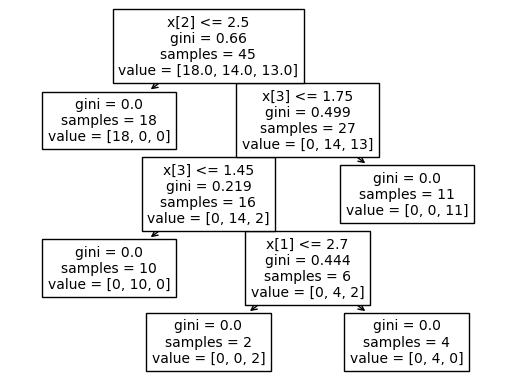

In [466]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
#
clf = clf.fit(X_test, y_test)
tree.plot_tree(clf)

[Text(0.5, 0.9, 'x[3] <= 0.8\ngini = 0.66\nsamples = 45\nvalue = [18.0, 14.0, 13.0]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0]'),
 Text(0.41666666666666663, 0.8, 'True  '),
 Text(0.6666666666666666, 0.7, 'x[2] <= 5.15\ngini = 0.499\nsamples = 27\nvalue = [0, 14, 13]'),
 Text(0.5833333333333333, 0.8, '  False'),
 Text(0.5, 0.5, 'x[1] <= 2.6\ngini = 0.219\nsamples = 16\nvalue = [0, 14, 2]'),
 Text(0.3333333333333333, 0.3, 'x[2] <= 4.45\ngini = 0.444\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 10\nvalue = [0, 10, 0]'),
 Text(0.8333333333333334, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11]')]

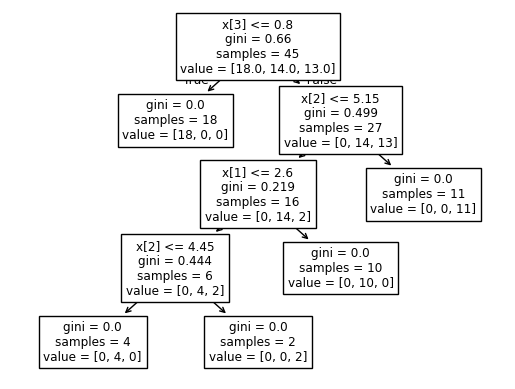

In [467]:
tree.DecisionTreeClassifier

clf=tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_test, y_test)
tree.plot_tree(clf)

In [468]:
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9111111111111111

In [469]:
from sklearn.linear_model import PassiveAggressiveClassifier
PAC=PassiveAggressiveClassifier()
PAC.fit(X_train,y_train)
score=PAC.score(X_test,y_test)
print(f"Score using PassiveAggressiveClassifier: {score}")

Score using PassiveAggressiveClassifier: 0.9555555555555556


In [470]:
from sklearn.linear_model import PassiveAggressiveRegressor
PAR=PassiveAggressiveRegressor()
PAR.fit(X_train,y_train)
score=PAR.score(X_test,y_test)
print(score)

0.9350341024450989


In [471]:
from sklearn.naive_bayes import CategoricalNB
CNB=CategoricalNB()
CNB.fit(X_train,y_train)
CNB.score(X_test,y_test)

0.9333333333333333

In [472]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(X_train,y_train)
MNB.score(X_test,y_test)

1.0

In [473]:
from sklearn.linear_model import BayesianRidge
bayes=BayesianRidge()
bayes.fit(X_test,y_test)
print(bayes.score(X_train,y_train))

0.9205010245862999


In [474]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf=LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

1.0

In [475]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.9333333333333333

In [476]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9111111111111111

In [477]:
from sklearn.linear_model import LogisticRegression
clf =LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.9386034467490472